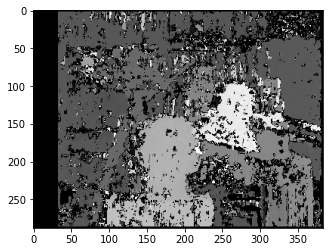

32 5


In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

imgL = cv2.imread('C:/Users/Asus/Desktop/tsukaba_l.png', 0)
imgR = cv2.imread('C:/Users/Asus/Desktop/tsukaba_r.png', 0)

stereo = cv2.StereoBM_create(numDisparities=32, blockSize=5)
disparity = stereo.compute(imgL, imgR)
plt.imshow(disparity,'gray')
plt.show()
print(32, 5)

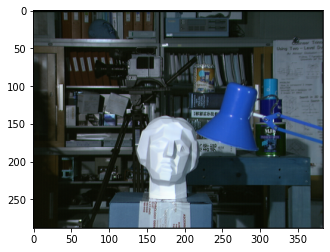

In [2]:
im = cv2.imread('C:/Users/Asus/Desktop/tsukaba_l.png')
plt.imshow(im)

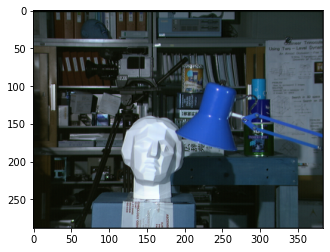

In [3]:
im = cv2.imread('C:/Users/Asus/Desktop/tsukaba_r.png')
plt.imshow(im)

In [4]:
depthMap = np.zeros(disparity.shape)
Focal_length = 615
cameraBaseline = 0.1
h, w = disparity.shape
for i in range(h):
    for j in range(w):
        if disparity[i, j] > 0:
            depthMap[i, j] = (cameraBaseline * Focal_length) / disparity[i, j]
        else:
            depthMap[i, j] = 10000

In [5]:
depthMap[120:140, 260:280]

array([[1.00000000e+04, 1.00000000e+04, 1.34868421e-01, 1.35164835e-01,
        1.35164835e-01, 1.35761589e-01, 1.35761589e-01, 1.35761589e-01,
        1.35761589e-01, 1.35761589e-01, 1.35761589e-01, 1.35761589e-01,
        1.35761589e-01, 1.34868421e-01, 1.34279476e-01, 1.32258065e-01,
        1.30296610e-01, 1.30296610e-01, 1.31130064e-01, 1.31130064e-01],
       [1.00000000e+04, 1.00000000e+04, 1.34868421e-01, 1.35164835e-01,
        1.35164835e-01, 1.35761589e-01, 1.36061947e-01, 1.36061947e-01,
        1.36061947e-01, 1.36666667e-01, 1.36363636e-01, 1.00000000e+04,
        1.35164835e-01, 1.34279476e-01, 1.33116883e-01, 1.31410256e-01,
        1.30296610e-01, 1.30851064e-01, 1.33695652e-01, 1.33695652e-01],
       [1.00000000e+04, 1.00000000e+04, 1.34868421e-01, 1.34868421e-01,
        1.34868421e-01, 1.35462555e-01, 1.35761589e-01, 1.35761589e-01,
        1.36061947e-01, 1.00000000e+04, 1.74220963e-01, 1.00000000e+04,
        1.34573304e-01, 1.33116883e-01, 1.32543103e-01, 1.3225

In [6]:
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('x = ', x, ' y = ', y, ' distance = ', depthMap[x, y], 'metres')
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.imshow('DepthMap', imgL)

In [9]:
cv2.imshow('DepthMap', imgL)
cv2.setMouseCallback('DepthMap', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

x =  191  y =  211  distance =  0.1824925816023739 metres
x =  161  y =  177  distance =  0.18413173652694612 metres
x =  251  y =  159  distance =  10000.0 metres
x =  105  y =  130  distance =  0.7068965517241379 metres
x =  75  y =  128  distance =  0.3153846153846154 metres
x =  145  y =  45  distance =  0.384375 metres
x =  29  y =  79  distance =  0.384375 metres
x =  174  y =  265  distance =  0.13141025641025642 metres


IndexError: index 322 is out of bounds for axis 0 with size 288